# Read all log.txt

In [1]:
import glob
import pandas as pd
from pandas.core.common import flatten
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "D:/Dev/ReinforcementLearning/results/CartPole-v1/"

In [3]:
logs = glob.glob(path + "/*/*/*.txt")

In [4]:
def read_file(path):
    values = []
    col = path.split("\\")[-2].split("_")
           
    with open(path, "r") as file:
        for i in file.readlines():
            values.append([path.split("\\")[-3],*col,*i.split("\n")[0].split(",")])
    return values

In [5]:
columns = ["algo","step_train","batch_size", "gamma", "greedy_exploration","network","", "optimizer", "lr", "memories", "max_size", "step", "max", "min", "avg", "sum"]

In [6]:
df = pd.DataFrame([], columns = columns)
for file in logs:
    ite = pd.DataFrame(read_file(file), columns = columns)
    df = pd.concat([df,ite],  ignore_index=True)

# Result

In [7]:
df.head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
0,CategoricalDQN,1,1,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,1,1.0,1.0,1.0,10.0
1,CategoricalDQN,1,1,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,166,1.0,1.0,1.0,8.0
2,CategoricalDQN,1,1,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,332,1.0,1.0,1.0,10.0
3,CategoricalDQN,1,1,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,498,1.0,1.0,1.0,9.0
4,CategoricalDQN,1,1,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,500,1.0,1.0,1.0,9.0
5,CategoricalDQN,1,1,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,1,1.0,1.0,1.0,8.0
6,CategoricalDQN,1,1,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,166,1.0,1.0,1.0,9.0
7,CategoricalDQN,1,1,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,332,1.0,1.0,1.0,11.0
8,CategoricalDQN,1,1,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,498,1.0,1.0,1.0,10.0
9,CategoricalDQN,1,1,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,500,1.0,1.0,1.0,9.0


## Sort by sum and step

In [8]:
for c in ["step_train", "batch_size", "gamma", "lr", "step", "max", "min", "avg", "sum"]:
    df[c] = df[c].astype(float)
for c in df.columns:
    if df[c].dtypes  == "object":
        df[c] = df[c].astype('category')

In [9]:
df.sort_values(by =["sum","step"],  ascending = [False, True]).head(50)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
3883,DoubleDQN,1.0,32.0,0.98,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,32,166.0,1.0,1.0,1.0,500.0
4948,DoubleDQN,1.0,64.0,0.98,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,32,166.0,1.0,1.0,1.0,500.0
9818,DoubleDQN,4.0,32.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
10713,DoubleDQN,4.0,32.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0
12158,DQN,1.0,1.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
12963,DQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0
13238,DQN,1.0,32.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
13503,DQN,1.0,32.0,0.98,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0
13958,DQN,1.0,32.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
14028,DQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0


## Correlation matrix

In [10]:
df_corr = df.copy()

In [11]:
for c in df_corr.columns:
    try:
        df_corr[c] = df_corr[c].cat.codes
    except:
        pass

In [12]:
df_corr.corr()["sum"]

algo                  0.032472
step_train           -0.136980
batch_size            0.085920
gamma                -0.013951
greedy_exploration    0.079032
network              -0.102326
                           NaN
optimizer                  NaN
lr                   -0.135744
memories                   NaN
max_size              0.003324
step                  0.106869
max                        NaN
min                        NaN
avg                        NaN
sum                   1.000000
Name: sum, dtype: float64

In [13]:
df_corr.corr()

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
algo,1.000000,0.041605,4.243304e-02,-0.142675,-0.000632,0.472651,NaN,NaN,-0.000485,NaN,-1.172632e-04,0.000077,NaN,NaN,NaN,0.032472
step_train,0.041605,1.000000,1.606574e-02,0.005594,0.000049,0.041605,NaN,NaN,-0.000343,NaN,-4.513251e-05,0.000114,NaN,NaN,NaN,-0.136980
batch_size,0.042433,0.016066,1.000000e+00,0.011472,0.000299,0.042433,NaN,NaN,-0.000157,NaN,4.104418e-07,0.000085,NaN,NaN,NaN,0.085920
gamma,-0.142675,0.005594,1.147239e-02,1.000000,-0.000020,-0.142675,NaN,NaN,0.000141,NaN,1.849838e-05,-0.000047,NaN,NaN,NaN,-0.013951
greedy_exploration,-0.000632,0.000049,2.992025e-04,-0.000020,1.000000,-0.000632,NaN,NaN,0.000045,NaN,-2.536721e-05,-0.000064,NaN,NaN,NaN,0.079032
network,0.472651,0.041605,4.243304e-02,-0.142675,-0.000632,1.000000,NaN,NaN,-0.000485,NaN,-1.172632e-04,0.000077,NaN,NaN,NaN,-0.102326
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
optimizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lr,-0.000485,-0.000343,-1.569390e-04,0.000141,0.000045,-0.000485,NaN,NaN,1.000000,NaN,-4.068026e-05,0.000102,NaN,NaN,NaN,-0.135744
memories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

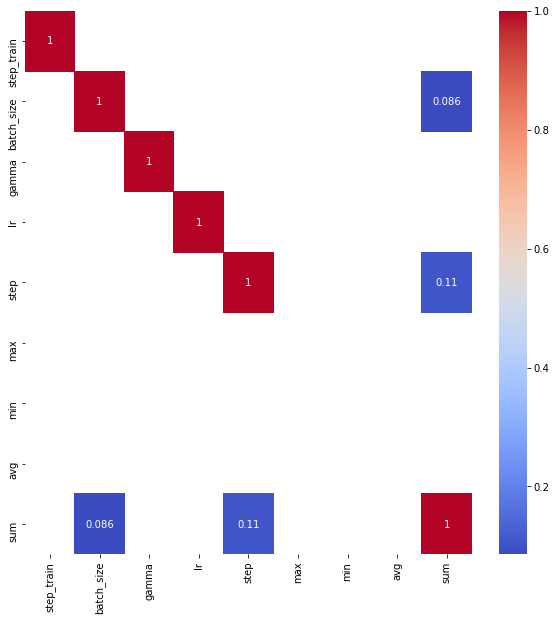

In [14]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df.corr()[df.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

## Correlation matrix for best result

In [15]:
df_corr_best = df_corr[df_corr["sum"] >= 300]

In [16]:
df_corr_best.corr()

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
algo,1.000000,0.161573,0.069128,0.081961,0.183987,0.161847,NaN,NaN,0.077578,NaN,0.012971,0.072946,NaN,NaN,NaN,-0.178712
step_train,0.161573,1.000000,-0.029407,0.140304,0.067857,-0.003722,NaN,NaN,0.000764,NaN,0.053691,-0.110400,NaN,NaN,NaN,0.047209
batch_size,0.069128,-0.029407,1.000000,-0.033076,0.022319,-0.072114,NaN,NaN,-0.078908,NaN,-0.041502,-0.000832,NaN,NaN,NaN,-0.004929
gamma,0.081961,0.140304,-0.033076,1.000000,0.050830,0.058064,NaN,NaN,0.083803,NaN,0.068154,0.109168,NaN,NaN,NaN,0.081707
greedy_exploration,0.183987,0.067857,0.022319,0.050830,1.000000,-0.208645,NaN,NaN,0.011651,NaN,0.111411,0.213856,NaN,NaN,NaN,0.047382
network,0.161847,-0.003722,-0.072114,0.058064,-0.208645,1.000000,NaN,NaN,0.326092,NaN,0.035457,-0.134311,NaN,NaN,NaN,-0.007255
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
optimizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lr,0.077578,0.000764,-0.078908,0.083803,0.011651,0.326092,NaN,NaN,1.000000,NaN,-0.062647,-0.138046,NaN,NaN,NaN,-0.048668
memories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

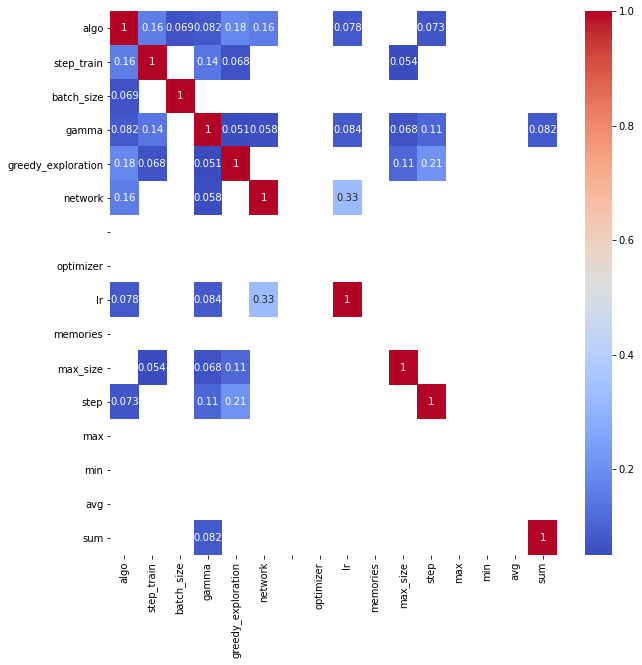

In [17]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_corr_best.corr()[df_corr_best.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

# Result by algo

### DQN

In [18]:
df_DQN = df[df["algo"] == "DQN"].copy()

In [19]:
df_DQN.corr()

,step_train,batch_size,gamma,lr,step,max,min,avg,sum
step_train,1.000000e+00,-1.719892e-16,3.345881e-15,6.027829e-17,8.651042e-21,NaN,NaN,NaN,-0.157645
batch_size,-1.719892e-16,1.000000e+00,-4.777700e-15,7.456483e-17,-4.132011e-19,NaN,NaN,NaN,0.081967
gamma,3.345881e-15,-4.777700e-15,1.000000e+00,-1.122082e-16,-3.597175e-17,NaN,NaN,NaN,-0.008696
lr,6.027829e-17,7.456483e-17,-1.122082e-16,1.000000e+00,-2.012520e-20,NaN,NaN,NaN,-0.146583
step,8.651042e-21,-4.132011e-19,-3.597175e-17,-2.012520e-20,1.000000e+00,NaN,NaN,NaN,0.105973
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sum,-1.576454e-01,8.196650e-02,-8.696077e-03,-1.465830e-01,1.059732e-01,NaN,NaN,NaN,1.000000


In [20]:
max(df_DQN["sum"]), min(df_DQN["sum"])

(500.0, 8.0)

In [21]:
df_DQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
12158,DQN,1.0,1.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
12963,DQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0
13238,DQN,1.0,32.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
13503,DQN,1.0,32.0,0.98,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0
13958,DQN,1.0,32.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
14028,DQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0
14043,DQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0
14323,DQN,1.0,64.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,32,166.0,1.0,1.0,1.0,500.0
14583,DQN,1.0,64.0,0.98,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0
15038,DQN,1.0,64.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0


<AxesSubplot:>

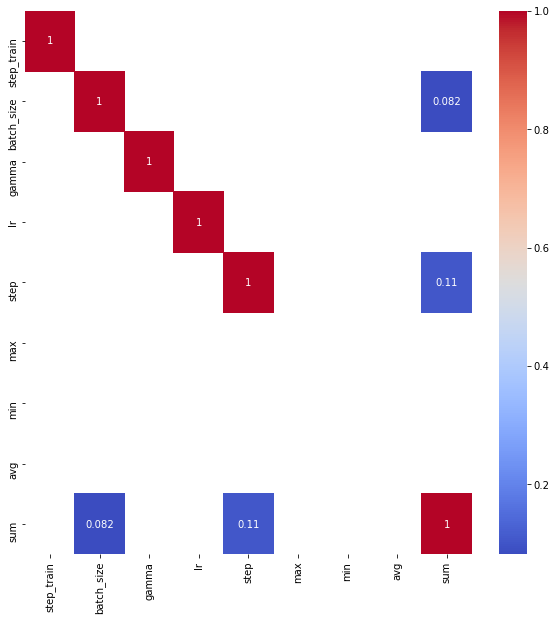

In [22]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[df_DQN.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

### DoubleDQN

In [23]:
df_DoubleDQN = df[df["algo"] == "DoubleDQN"].copy()

In [24]:
df_DoubleDQN.corr()

,step_train,batch_size,gamma,lr,step,max,min,avg,sum
step_train,1.000000,-0.000407,0.000131,-0.000240,0.000129,NaN,NaN,NaN,-0.141711
batch_size,-0.000407,1.000000,0.000197,-0.000360,0.000193,NaN,NaN,NaN,0.092233
gamma,0.000131,0.000197,1.000000,0.000116,-0.000062,NaN,NaN,NaN,0.014926
lr,-0.000240,-0.000360,0.000116,1.000000,0.000114,NaN,NaN,NaN,-0.140252
step,0.000129,0.000193,-0.000062,0.000114,1.000000,NaN,NaN,NaN,0.125440
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sum,-0.141711,0.092233,0.014926,-0.140252,0.125440,NaN,NaN,NaN,1.000000


In [25]:
max(df_DoubleDQN["sum"]), min(df_DoubleDQN["sum"])

(500.0, 8.0)

In [26]:
df_DoubleDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
3883,DoubleDQN,1.0,32.0,0.98,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,32,166.0,1.0,1.0,1.0,500.0
4948,DoubleDQN,1.0,64.0,0.98,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,32,166.0,1.0,1.0,1.0,500.0
9818,DoubleDQN,4.0,32.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,16,166.0,1.0,1.0,1.0,500.0
10713,DoubleDQN,4.0,32.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,128,166.0,1.0,1.0,1.0,500.0
4589,DoubleDQN,1.0,64.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,32,332.0,1.0,1.0,1.0,500.0
4949,DoubleDQN,1.0,64.0,0.98,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,32,332.0,1.0,1.0,1.0,500.0
5044,DoubleDQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,128,332.0,1.0,1.0,1.0,500.0
2444,DoubleDQN,1.0,1.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,16,498.0,1.0,1.0,1.0,500.0
3860,DoubleDQN,1.0,32.0,0.98,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,128,498.0,1.0,1.0,1.0,500.0
4955,DoubleDQN,1.0,64.0,0.98,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,128,498.0,1.0,1.0,1.0,500.0


<AxesSubplot:>

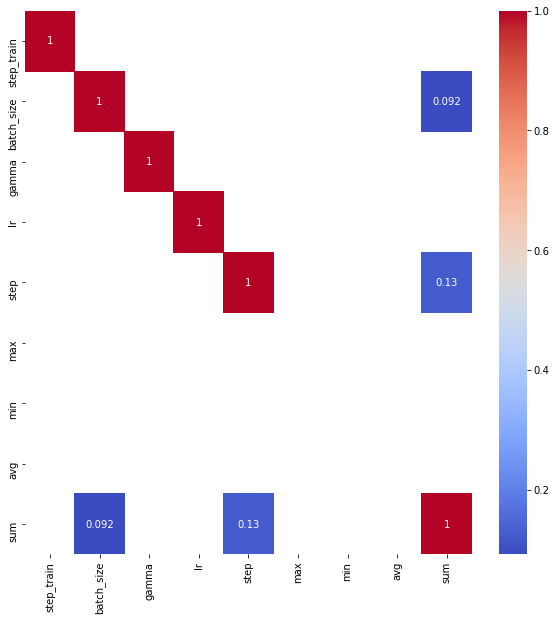

In [27]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DoubleDQN.corr()[df_DoubleDQN.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

### CategoricalDQN

In [28]:
df_CategoricalDQN = df[df["algo"] == "CategoricalDQN"].copy()

In [29]:
df_CategoricalDQN.corr()

,step_train,batch_size,gamma,lr,step,max,min,avg,sum
step_train,1.000000,0.136682,0.290494,-0.001957,0.000468,NaN,NaN,NaN,0.068370
batch_size,0.136682,1.000000,0.372571,0.000587,-0.000140,NaN,NaN,NaN,-0.015008
gamma,0.290494,0.372571,1.000000,-0.001343,0.000321,NaN,NaN,NaN,0.022541
lr,-0.001957,0.000587,-0.001343,1.000000,0.000515,NaN,NaN,NaN,-0.065605
step,0.000468,-0.000140,0.000321,0.000515,1.000000,NaN,NaN,NaN,-0.108168
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sum,0.068370,-0.015008,0.022541,-0.065605,-0.108168,NaN,NaN,NaN,1.000000


In [30]:
max(df_CategoricalDQN["sum"]), min(df_CategoricalDQN["sum"])

(126.0, 8.0)

In [31]:
df_CategoricalDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
1676,CategoricalDQN,4.0,1.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0010,ExperienceReplay,16,1.0,1.0,1.0,1.0,126.0
1081,CategoricalDQN,32.0,1.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,32,1.0,1.0,1.0,1.0,91.0
1302,CategoricalDQN,32.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,166.0,1.0,1.0,1.0,71.0
2081,CategoricalDQN,4.0,64.0,0.99,EpsilonGreedy-0.1,C51Network,,Adam,0.0010,ExperienceReplay,16,1.0,1.0,1.0,1.0,62.0
1861,CategoricalDQN,4.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0010,ExperienceReplay,32,1.0,1.0,1.0,1.0,60.0
1303,CategoricalDQN,32.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,332.0,1.0,1.0,1.0,57.0
90,CategoricalDQN,1.0,1.0,0.95,EpsilonGreedy-0.1,C51Network,,Adam,0.0001,ExperienceReplay,128,1.0,1.0,1.0,1.0,52.0
1305,CategoricalDQN,32.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0001,ExperienceReplay,16,500.0,1.0,1.0,1.0,49.0
1881,CategoricalDQN,4.0,32.0,0.99,EpsilonGreedy-0.1,C51Network,,Adam,0.0001,ExperienceReplay,128,1.0,1.0,1.0,1.0,48.0
1611,CategoricalDQN,4.0,1.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,128,1.0,1.0,1.0,1.0,46.0


<AxesSubplot:>

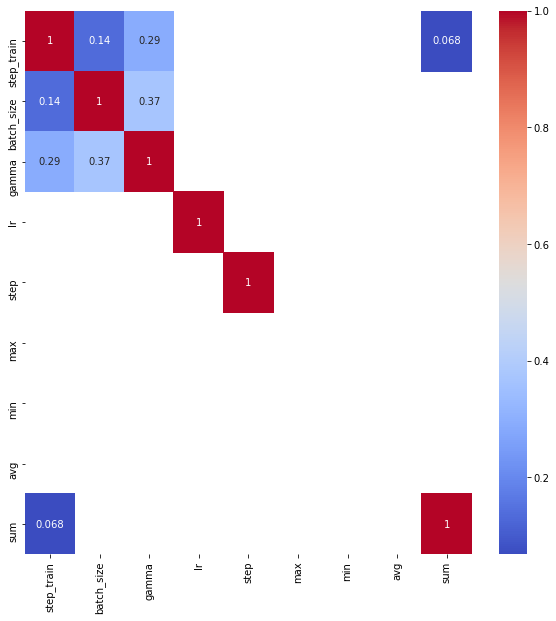

In [32]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_CategoricalDQN.corr()[df_CategoricalDQN.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)